# <strong>End-to-End ML Project</strong>

There are 8 main steps for a ML project, also called the `ML checklist` in this book:

<ol>
  <li><strong>Frame the problem and Look at the big picture</strong></li>
  Define the problem, what solution will be used, are previous solutions that can be reused, which type of model would work better, which performance metric should you use.
  <br>
  <li><strong>Get the data</strong></li>
  List all the data you need, where can you find it, legal obligations or authorization, creating the workspace, check if the format is correct, delete sensitive information. Sample the training and test set. Once you have a test set, don't use it again. It is only for testing purposes.
  <strong><italic>Try to automate as much as possible</strong></italic>
  <br>
  <li><strong>Explore and visualize the data to gain insights</strong></li>
  Try to gain insights from a domain expert, create copy of the data for EDA, study each attribute and how it relates with others, correlations, possible transformations that could work. Study how would you manually solve the problem.
  <br>
  <li><strong>Prepare the data for the ML algorithms</strong></li>
  Work on copies of the data, don't touch the original dataset. Clean the data, perform feature selection/engineering/scaling.
  <br>
  <li><strong>Select a model and train it</strong></li>
  If the data is huge, sample smaller training sets so you can compare different models. Try to automate as much as possible. Use cross-validation, means, standard deviations. Select the top 3-5 most promising models. Preferrably, choose models that make different types of error. It doesn't work to have 5 different models that fail in the same spot.
  <br>
  <li><strong>Fine-tune your model</strong></li>
  Here you will need as much data as possible, automate as much as you can, fine-tune each hyperparameter using cross-validation. Try ensemble methods. Then, at the end, measure its performance on the test set to get the generalization error
  <br>
  <li><strong>Present your solution</strong></li>
  Document every step of what you have done. Create a nice presentation (don't forget to highlight the big picture, stakeholders don't care much about details). Explain the solutions with arguments and compelling visualizations
  <br>
  <li><strong>Launch, monitor and maintain the system</strong></li>
  Get it ready por production, monitor its performance and the inputs' quality. Retrain if neccesary.<br>
</ol>

Here we will analyze house prices in California in 1990. The data reflect block groups or districts (also called district, they are zones with 600 to 3000 people).

The goal is that the model predicts the median housing price in any district, given all the other metrics or features in the data set (`"housing.csv"`)



When evaluating, keep in mind `univariate` problems (predict a single value). `Multivariate` are models that try to predict multiple values.

## Select a Performance Measure

For regression problem, the `root mean square error (RMSE)` is the typical performance metric:

$RMSE(X,h) = \sqrt{\frac{1}{m}\sum^{m}_{i=1}(h(x^{(i)})-y^{(i)})^{2}}$

Where:

$m$ is the number of instances in the dataset, for example if there are 2000 districts, then $m = 2000$.

$x^{(i)}$ is a vector of all the features values (but exluding the label or solution) of the $i^{th}$ instance in the dataset and $y^{(i)}$ is its label. `There is one row per instance`.

$X$ is a matrix with all the feature values (without the labels or solutions) of all the instances.

$h$ is you prediction function or `hypothesis`. When the system is given an instance's feature vector $x^{(i)}$, it outputs a predicted value $\hat{y}=h(x^{(i)})$.

$RMSE(X,h)$ is the cost function measured on the set of examples using the hypothesis $h$.

> I will use lowercase letters for vectors and UPPERCASE for matrices.

If there are many outliers, $RMSE$ is not recommended, and `mean absolute error` should be used instead ($MAE$):

$MAE(X,H) = \frac{1}{m}\sum^{m}_{i=1}|h(x^{(i)})-y^{(i)}|$

Both RMSE and MAE are way to measure the distance between 2 vectors: the vector of predictions and the vetor of target values.

In [1]:
import pandas as pd
import numpy as np
import requests

# Fetch the housing.csv file from GitHub
def get_housing_data():
  url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
  response = requests.get(url)
  if response.status_code == 200:
    df = pd.read_csv(url)
    return df
  else:
    return None

housing_data = get_housing_data()
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


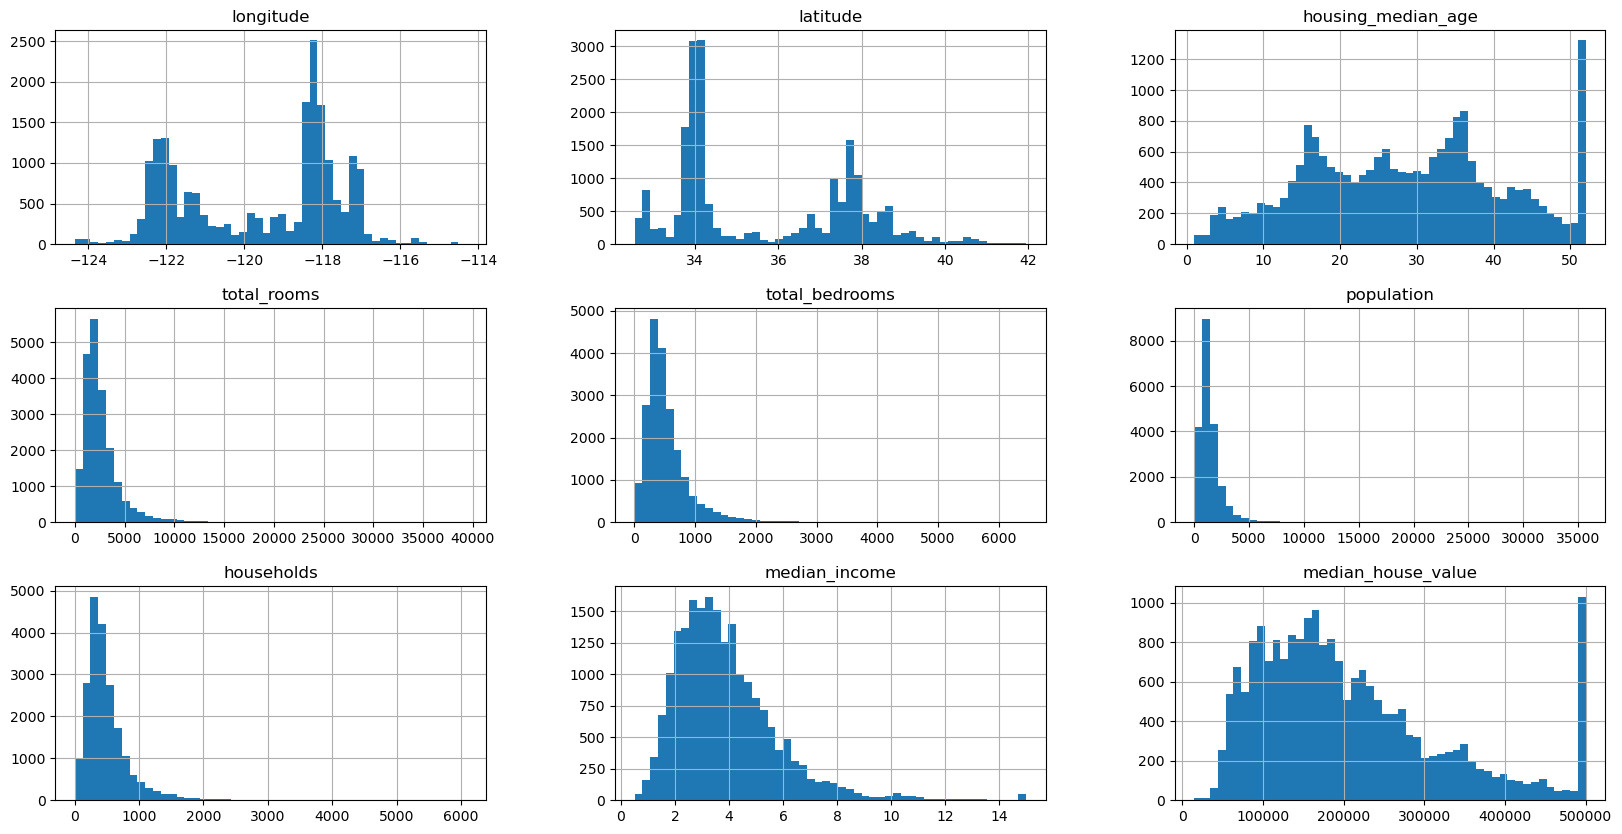

In [4]:
import matplotlib.pyplot as plt

# Plot histograms to see the distribution of each feature
housing_data.hist(bins=50, figsize=(20,10))
plt.show()

## Creating a Test Set Right Now

It is better to take the sample that will be the test set right now. You can start to inadvertedly starting to make assumptions that may bias the data which can make you choose a particular model and overfit it.

So you should pick random instances to create the test set (around 20% of the dataset or less if you have millions of instances).

In [5]:
# Creating the test set using numpy

def get_random_sample(data, test_ratio):
  """Takes a dataframe and a test ratio, shuffles the indexes to create a new randomly indexed dataset. Split and return a train and test set.
  The flaw is, every time it runs the results will be different. We need consistency"""
  shuffle_data = np.random.permutation(len(data)) # shuffles the indexes randomly
  test_set_size = int(len(data)*test_ratio) 
  train_set_indexes = shuffle_data[0:test_set_size]
  test_set_indexes = shuffle_data[test_set_size:]
  return data.iloc[train_set_indexes], data.iloc[test_set_indexes]

train_set, test_set = get_random_sample(housing_data,0.2)


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 19354 to 5533
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4084 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [7]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 6752 to 2276
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


We want to keep consistency to the train and test datasets. The preivous code works but everytime it runs the sets will be different. There are many techniques to do so, but we will use `Scikit-Learn` for it as it is more straightforward by using `train_test_split()`, which works pretty much the same as `get_random_sample()`.
In the code below, `random_state` works the same as a `seed` in numpy. It allows the sample to be the same everytime you run the code block.

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [10]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      3921 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


Upong looking at the histograms above, the `median_income` has most of the salaries between 1.5 and 6 (in tens of thousands USD$). A better way to look at the distribution is to `stratify` or create categories for the data.

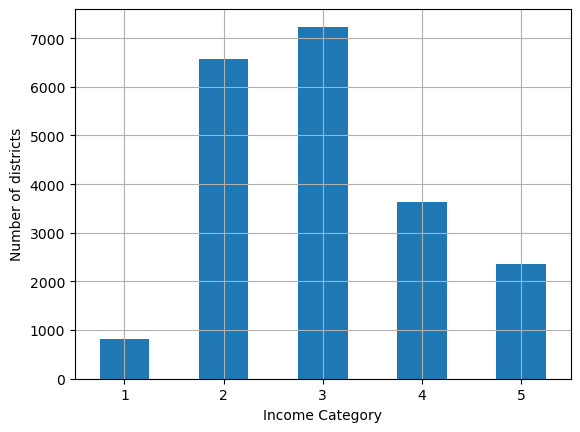

In [11]:
housing_data["income_category"] = pd.cut(housing_data["median_income"], 
                                        bins=[0.,1.5,3.0,4.5,6., np.inf], 
                                        labels=[1,2,3,4,5])

# Now we plot this

housing_data["income_category"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

In [12]:
housing_data["income_category"].value_counts().sort_index()

income_category
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

With the above categories, it is more easy to to `stratified sampling` by using the Scikit-Learn `model_selection` package with the function `StratifiedShuffleSplit` class.

> Stratified sampling is when a population is divided into homogeneous subgroups called `strata`, and the corresponding number of samples is taken from each strata so the overall sample is representative of as many elements of the population as possible.

Because median income varies so much, we created the categories, so each category can be sampled to have an equal number of people of each salary category in the final sample. This will reduce the bias.

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits=[]
for train_index, test_index in splitter.split(housing_data, housing_data["income_category"]):
  strat_train_set_n = housing_data.iloc[train_index]
  strat_test_set_n = housing_data.iloc[test_index]
  strat_splits.append([strat_train_set_n,strat_test_set_n])

strat_train_set, strat_test_set = strat_splits[0]

Since stratified smaplig is very common, there a specific function for that called `train_test_split()` with the `stratify` argument

In [16]:
strat_train_set, strat_test_set = train_test_split(housing_data,test_size=0.2,stratify=housing_data["income_category"],random_state=42)

In [17]:
strat_train_set["income_category"].value_counts()

income_category
3    5789
2    5265
4    2911
5    1890
1     657
Name: count, dtype: int64

In [18]:
strat_test_set["income_category"].value_counts()

income_category
3    1447
2    1316
4     728
5     472
1     165
Name: count, dtype: int64

In [19]:
strat_test_set["income_category"].value_counts()/len(strat_test_set)

income_category
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

The `income_category` was used only to stratify data and sample it. But it won't be used any further. To avoid that the model gets a wrong perception of the data, that column must be dropped.

In [20]:
strat_train_set.drop("income_category", axis=1,inplace=True)
strat_test_set.drop("income_category", axis=1,inplace=True)

## Exploring and Visualizing the Data

For this stage is very important to `put the test set aside and focus only on the train set`. We need to have a look at the training set only in order to avoid any bias or assumption that could affect the model.

> Make a copy of the training set here. You don't want to mess up with the training data

In [22]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


We see that there is geographical information, ages, total counts, prices and populations. Let's start first with geographical data

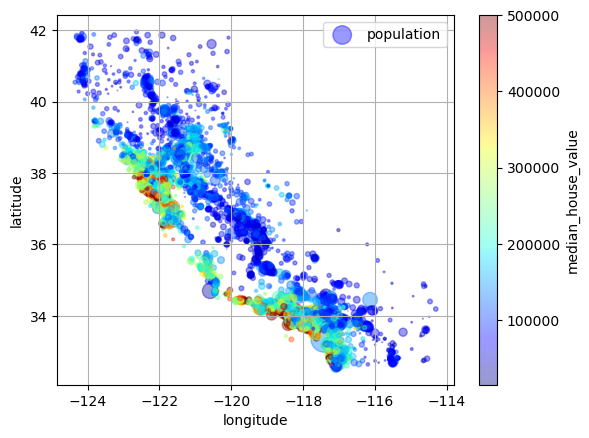

In [35]:
# by using a scatterplot of latitude and longitude we can kind of resemble the California state
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True, alpha=0.4,
            s=housing["population"]/100,
            label="population",
            c="median_house_value",
            cmap=plt.get_cmap("jet"),
            colorbar=True,
            sharex=False)
plt.show()

In the image above we can see that price seems to be very related to some particular locations as well as population density. Keep in mind that those green and red zones are the ones near the ocean 👀.

## Look for Correlations